### Business Questions to Answer
1. Who are our most valuable customers? What defines them?
2. Are there distinct customer groups with similar spending behaviors? How can we target
them effectively?
3. What demographic factors (e.g., age, gender, income) influence spending habits?
4. What specific actions can MallCo take to improve retention and boost spending?


In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
import seaborn as sns

#### 1. Loading the Dataset


In [9]:
# Load the data
data = pd.read_csv('../data/Mall_Customers.csv')

#### 2. Basic dataset information
- Sample
- Shape
- Info
- Missing values
- Duplicated values
- Basic statistics (numerical variables)
- Distribution (categorical variables)

# Get a reproducible random sample by setting random_state
sample = data.sample(n=20, random_state=42)
print(sample)

# 1. Basic dataset information
print("1. Basic dataset information:")
print("\nDataset Shape:", data.shape)
print("\nDataset Info:")
data.info()

# 2. Check for missing values
print("-" * 50)
print("\n2. Missing Values:")
print(data.isna().sum())

# 3. Check for duplicates
print("-" * 50)
print("\n3. Number of duplicates:", data.duplicated().sum())

# 4. Basic statistics for numerical columns
print("-" * 50)
print("\n4. Basic Statistics (Numerical Columns):")
print(data.describe())

# 5. Value counts for categorical columns
print("-" * 50)
print("\n5. Categorical Columns Distribution:")
# Automatically identify categorical columns
for col in data.select_dtypes(include=['object', 'category']).columns:
    print(f"\n{col} Distribution:")
    print(data[col].value_counts())


#### 3. Univariate Analysis

##### Numerical variables
- Histogram with kde (distribution)
- Individual variable summary statistics (describe & mode)

# 1. Distribution Plots for Numerical Variables
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

# Age Distribution
sns.histplot(data=data, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age', fontsize=14)
axes[0].set_xlabel('Age (years)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Annual Income Distribution
sns.histplot(data=data, x='Annual Income (k$)', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Annual Income', fontsize=14)
axes[1].set_xlabel('Annual Income (thousands $)', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

# Spending Score Distribution
sns.histplot(data=data, x='Spending Score (1-100)', kde=True, ax=axes[2])
axes[2].set_title('Distribution of Spending Score', fontsize=14)
axes[2].set_xlabel('Spending Score (1-100)', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

# Print summary statistics for numerical variables
print("\nSummary Statistics for Numerical Variables:")
print("\nAge Statistics:")
print(data['Age'].describe().round(2))
print("\nAnnual Income Statistics:")
print(data['Annual Income (k$)'].describe().round(2))
print("\nSpending Score Statistics:")
print(data['Spending Score (1-100)'].describe().round(2))

# Print mode for each numerical variable
print("\nMode Values:")
print("Age Mode:", data['Age'].mode().values[0])
print("Annual Income Mode:", data['Annual Income (k$)'].mode().values[0])
print("Spending Score Mode:", data['Spending Score (1-100)'].mode().values[0])

##### Categorical variables
- Barplot (percentage distribution)


# 2. Categorical Analysis (Gender)
plt.figure(figsize=(6, 4))

# Bar plot with percentages
gender_counts = data['Gender'].value_counts()
gender_percentages = (gender_counts / len(data) * 100).round(1)

sns.barplot(x=gender_percentages.index, y=gender_percentages.values)
plt.title('Gender Distribution (%)')
plt.ylabel('Percentage')
# Add percentage labels on top of each bar
for i, v in enumerate(gender_percentages):
    plt.text(i, v, f'{v}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()



#### 4. Multivariate analysis

- Scatter plot (permutate through combinations of numerical variables)
- Correlation coefficient (consider including correlation coefficient analysis by relevant categorical variables)
- Boxplot (distribution of numerical variables against categorical variables, per categorical variable) (where relevant)

# Create scatter plots with trend lines
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Relationships between Variables')

# 1. Age vs Spending Score
sns.scatterplot(data=data, 
                x='Age', 
                y='Spending Score (1-100)',
                hue='Gender',  # Color points by gender
                ax=axes[0])
sns.regplot(data=data,
            x='Age',
            y='Spending Score (1-100)',
            scatter=False,  # Don't add points again
            color='red',
            ax=axes[0])
axes[0].set_title('Age vs Spending Score')

# 2. Annual Income vs Spending Score
sns.scatterplot(data=data,
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Gender',
                ax=axes[1])
sns.regplot(data=data,
            x='Annual Income (k$)',
            y='Spending Score (1-100)',
            scatter=False,
            color='red',
            ax=axes[1])
axes[1].set_title('Annual Income vs Spending Score')

# 3. Age vs Annual Income
sns.scatterplot(data=data,
                x='Age',
                y='Annual Income (k$)',
                hue='Gender',
                ax=axes[2])
sns.regplot(data=data,
            x='Age',
            y='Annual Income (k$)',
            scatter=False,
            color='red',
            ax=axes[2])
axes[2].set_title('Age vs Annual Income')

plt.tight_layout()
plt.show()

# Print correlation coefficients
print("\nCorrelation Coefficients:")
correlations = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print(correlations.round(3))

# Additional insights: Calculate correlations by gender
print("\nCorrelations by Gender:")
for gender in data['Gender'].unique():
    print(f"\n{gender} Customers:")
    gender_corr = data[data['Gender'] == gender][['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
    print(gender_corr.round(3))

# Set up the plotting style
sns.set_style("whitegrid")
sns.set_context("notebook")

# Create box plots for numerical variables by gender
plt.figure(figsize=(15, 5))

# Age distribution by Gender
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='Gender', y='Age')
plt.title('Age Distribution by Gender')

# Annual Income distribution by Gender
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='Gender', y='Annual Income (k$)')
plt.title('Income Distribution by Gender')

# Spending Score distribution by Gender
plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='Gender', y='Spending Score (1-100)')
plt.title('Spending Score Distribution by Gender')

plt.tight_layout()
plt.show()

#### 5. Group Analysis
- Binning relevant numerical variables into categories to see catgory patterns against target variable
- Barplots
- Boxplots
- Summary statistics by variable groups
- Consider including categorical variable layer to analysis where relevant

# 1. Create age brackets
data['Age_Group'] = pd.cut(data['Age'], 
                          bins=[0, 20, 30, 40, 50, 60, 100],
                          labels=['<20', '21-30', '31-40', '41-50', '51-60', '60+'])

# 2. Create income brackets
data['Income_Group'] = pd.cut(data['Annual Income (k$)'],
                             bins=[0, 30, 60, 90, 120, 150],
                             labels=['Low (≤30k)', 'Lower-Mid (31-60k)', 
                                   'Upper-Mid (61-90k)', 'High (91-120k)', 'Very High (>120k)'])

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Group Analysis of Spending Patterns', fontsize=16)

# 1. Average Spending Score by Age Group and Gender
sns.barplot(data=data, x='Age_Group', y='Spending Score (1-100)', 
            ax=axes[0,0])
axes[0,0].set_title('Average Spending Score by Age Group')
axes[0,0].set_xlabel('Age Group')
axes[0,0].set_ylabel('Average Spending Score')

# 2. Average Spending Score by Income Group and Gender
sns.barplot(data=data, x='Income_Group', y='Spending Score (1-100)', 
            ax=axes[0,1])
axes[0,1].set_title('Average Spending Score by Income Group')
axes[0,1].set_xlabel('Income Group')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Average Spending Score by Age Group and Gender
sns.barplot(data=data, x='Age_Group', y='Spending Score (1-100)', 
            hue='Gender', ax=axes[1,0])
axes[1,0].set_title('Average Spending Score by Age Group and Gender')
axes[1,0].set_xlabel('Age Group')
axes[1,0].set_ylabel('Average Spending Score')

# 4. Average Spending Score by Income Group and Gender
sns.barplot(data=data, x='Income_Group', y='Spending Score (1-100)', 
            hue='Gender', ax=axes[1,1])
axes[1,1].set_title('Average Spending Score by Income Group and Gender')
axes[1,1].set_xlabel('Income Group')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Group Analysis of Spending Patterns', fontsize=16)

# 1. Box Plot of Spending Score by Age Group
sns.boxplot(data=data, x='Age_Group', y='Spending Score (1-100)', ax=axes[0,0])
axes[0,0].set_title('Distribution of Spending Score by Age Group')
axes[0,0].set_xlabel('Age Group')

# 2. Box Plot of Spending Score by Income Group
sns.boxplot(data=data, x='Income_Group', y='Spending Score (1-100)', ax=axes[0,1])
axes[0,1].set_title('Distribution of Spending Score by Income Group')
axes[0,1].set_xlabel('Income Group')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Box Plot of Spending Score by Age Group and Gender
sns.boxplot(data=data, x='Age_Group', y='Spending Score (1-100)', hue='Gender', ax=axes[1,0])
axes[1,0].set_title('Distribution of Spending Score by Age Group')
axes[1,0].set_xlabel('Age Group')

# 4. Box Plot of Spending Score by Income Group and Gender
sns.boxplot(data=data, x='Income_Group', y='Spending Score (1-100)', hue='Gender', ax=axes[1,1])
axes[1,1].set_title('Distribution of Spending Score by Income Group')
axes[1,1].set_xlabel('Income Group')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



# Print summary statistics
print("\nSummary Statistics by Age Group:")
age_group_stats = data.groupby('Age_Group')['Spending Score (1-100)'].agg(['mean', 'std', 'count']).round(2)
print(age_group_stats)

print("\nSummary Statistics by Income Group:")
income_group_stats = data.groupby('Income_Group')['Spending Score (1-100)'].agg(['mean', 'std', 'count']).round(2)
print(income_group_stats)

print("\nSummary Statistics by Age Group and Gender:")
age_gender_stats = data.groupby(['Age_Group', 'Gender'])['Spending Score (1-100)'].agg(['mean', 'std', 'count']).round(2)
print(age_gender_stats)

#### 6. Segmentation Analysis
- For further analysis of obvious clusters observed from multivariate scatterplot analysis (where relevant to EDA objective)
- Scatterplots with K-means clustering
- Segment characteristics (cluster count & percentage, numerical variable mean & range)

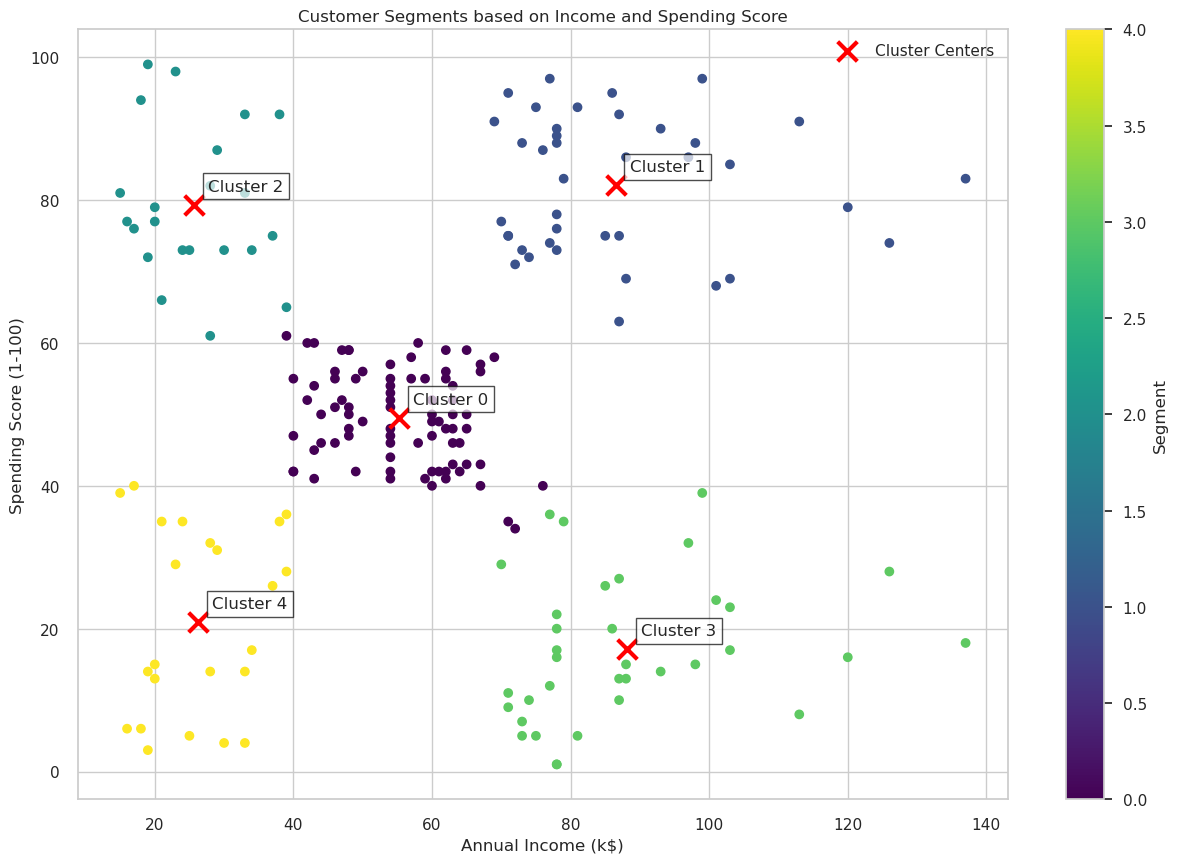


2D Segment Characteristics:

Cluster 0: Average Income - Average Spenders
--------------------------------------------------
Number of customers: 81.0 (40.5% of total)
Age: 42.72 (range: 18.0-70.0)
Income: $55.3k (range: $39.0k-$76.0k)
Spending Score: 49.52 (range: 34.0-61.0)

Cluster 1: High Income - High Spenders
--------------------------------------------------
Number of customers: 39.0 (19.5% of total)
Age: 32.69 (range: 27.0-40.0)
Income: $86.54k (range: $69.0k-$137.0k)
Spending Score: 82.13 (range: 63.0-97.0)

Cluster 2: Low Income - High Spenders
--------------------------------------------------
Number of customers: 22.0 (11.0% of total)
Age: 25.27 (range: 18.0-35.0)
Income: $25.73k (range: $15.0k-$39.0k)
Spending Score: 79.36 (range: 61.0-99.0)

Cluster 3: High Income - Low Spenders
--------------------------------------------------
Number of customers: 35.0 (17.5% of total)
Age: 41.11 (range: 19.0-59.0)
Income: $88.2k (range: $70.0k-$137.0k)
Spending Score: 17.11 (range: 1.

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set_style("whitegrid")
sns.set_context("notebook")

# Prepare data for clustering
# 2D clustering
X_2d = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)

# Apply K-means clustering (k=5 based on visible clusters in scatter plot)
kmeans_2d = KMeans(n_clusters=5, random_state=42)
data['Segment_2d'] = kmeans_2d.fit_predict(X_2d_scaled)

# Visualize 2D segments
plt.figure(figsize=(15, 10))

# Create scatter plot
scatter = plt.scatter(data['Annual Income (k$)'], 
                     data['Spending Score (1-100)'],
                     c=data['Segment_2d'], 
                     cmap='viridis')

# Add cluster centers with labels
centers = scaler_2d.inverse_transform(kmeans_2d.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidth=3, label='Cluster Centers')

# Add annotations for each cluster center
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', 
                (center[0], center[1]),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(facecolor='white', edgecolor='black', alpha=0.7))

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments based on Income and Spending Score')
plt.colorbar(scatter, label='Segment')
plt.legend()
plt.show()

# Print segment characteristics
segment_stats = data.groupby('Segment_2d').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'CustomerID': 'count'
}).round(2)
    
# Add descriptive labels to each cluster
cluster_descriptions = {
    0: "Average Income - Average Spenders",    # Purple cluster in the middle
    1: "High Income - High Spenders",          # Dark blue cluster top right
    2: "Low Income - High Spenders",           # Teal cluster top left
    3: "High Income - Low Spenders",           # Green cluster bottom right
    4: "Low Income - Low Spenders"             # Yellow cluster bottom left
}

# Print detailed segment characteristics with cluster labels

# First calculate total number of customers
total_customers = sum(segment_stats[('CustomerID', 'count')])

print("\n2D Segment Characteristics:")
for cluster in range(5):
    print(f"\nCluster {cluster}: {cluster_descriptions[cluster]}")
    print("-" * 50)
    stats = segment_stats.iloc[cluster]
    cluster_customers = stats[('CustomerID', 'count')]
    cluster_percentage = (cluster_customers / total_customers * 100).round(1)
    print(f"Number of customers: {cluster_customers} ({cluster_percentage}% of total)")
    print(f"Age: {stats[('Age', 'mean')]} (range: {stats[('Age', 'min')]}-{stats[('Age', 'max')]})")
    print(f"Income: ${stats[('Annual Income (k$)', 'mean')]}k (range: ${stats[('Annual Income (k$)', 'min')]}k-${stats[('Annual Income (k$)', 'max')]}k)")
    print(f"Spending Score: {stats[('Spending Score (1-100)', 'mean')]} (range: {stats[('Spending Score (1-100)', 'min')]}-{stats[('Spending Score (1-100)', 'max')]})")

# Create a more detailed segment profile
data['Cluster_Profile'] = data['Segment_2d'].map(cluster_descriptions)

print("\nSegment Distribution with Profiles:")
print(data['Cluster_Profile'].value_counts())



# Explain silhouette score and KELbowVisualizer
KElbowVisualizer is a tool used to determine the optimal number of clusters for K-means clustering. It does this by plotting the explained variance (or inertia) against the number of clusters and identifying the "elbow" point where adding more clusters yields diminishing returns in explained variance.

Silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a value close to 1 indicates that the object is well clustered, a value close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters, and a value close to -1 indicates that the object may have been assigned to the wrong cluster.

Optimal clusters for 2D data:


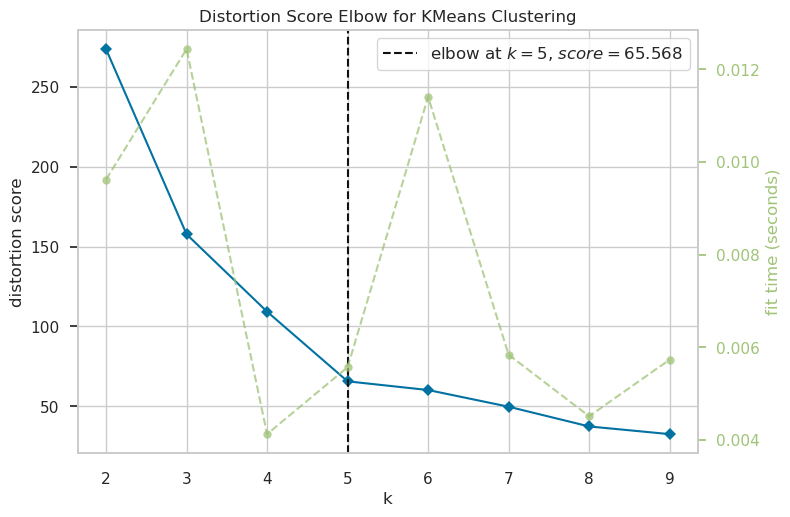

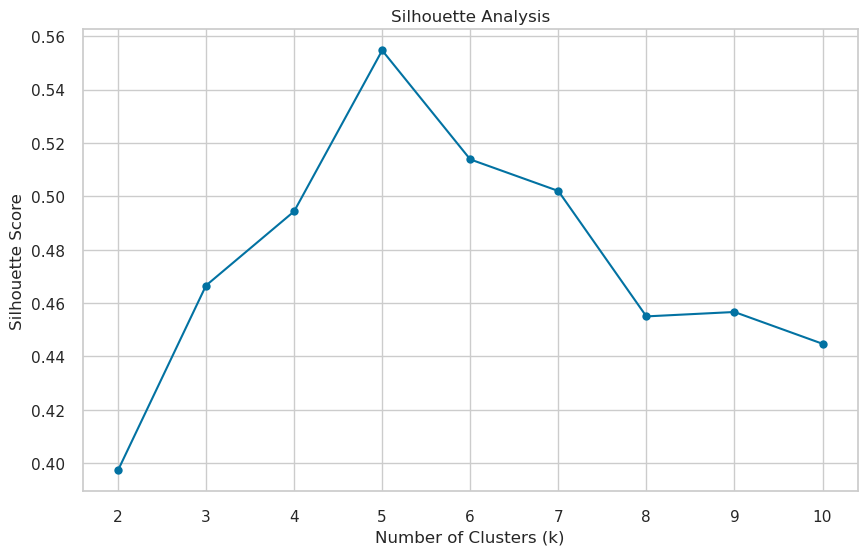

Suggested number of clusters: 5


In [11]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import numpy as np

# Function to find optimal number of clusters
def find_optimal_clusters(X, max_k=10):
    # Elbow Method
    elbow = KElbowVisualizer(KMeans(random_state=42), k=(2,max_k))
    elbow.fit(X)
    elbow.show()
    
    # Silhouette Analysis
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)
    
    plt.figure(figsize=(10,6))
    plt.plot(range(2, max_k+1), silhouette_scores, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')
    plt.show()
    
    return elbow.elbow_value_

# Find optimal clusters for 2D and 3D data
print("Optimal clusters for 2D data:")
optimal_k_2d = find_optimal_clusters(X_2d_scaled)
print(f"Suggested number of clusters: {optimal_k_2d}")


# Explain what is DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed together, marking as outliers points that lie alone in low-density regions. It is particularly useful for identifying clusters of varying shapes and sizes, and it does not require the number of clusters to be specified beforehand. DBSCAN works by defining a neighborhood around each point and expanding clusters based on the density of points in that neighborhood. Points that are not part of any cluster are considered noise or outliers. This makes DBSCAN effective for datasets with noise and varying cluster shapes, which is often the case in real-world data.

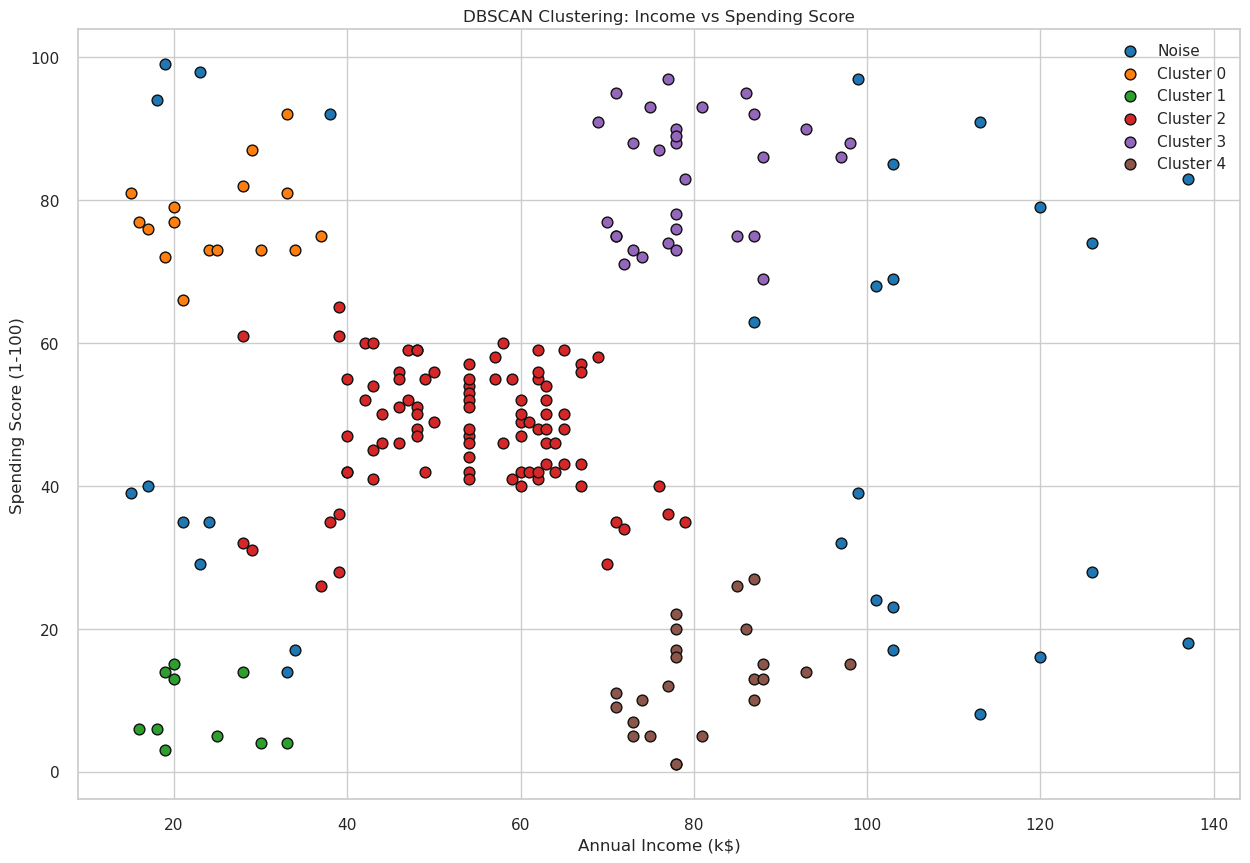

DBSCAN Cluster Counts:
DBSCAN_Cluster
 2    92
 3    30
-1    29
 4    23
 0    16
 1    10
Name: count, dtype: int64


In [12]:
# clustering analysis using DBSCAN

from sklearn.cluster import DBSCAN

# Fit DBSCAN on scaled 2D data
dbscan = DBSCAN(eps=0.45, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_2d_scaled)

# Add DBSCAN cluster labels to dataframe
data['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN clusters
plt.figure(figsize=(15, 10))
unique_labels = np.unique(dbscan_labels)
colors = sns.color_palette("tab10", len(unique_labels))

for label, color in zip(unique_labels, colors):
    mask = dbscan_labels == label
    plt.scatter(data.loc[mask, 'Annual Income (k$)'],
                data.loc[mask, 'Spending Score (1-100)'],
                c=[color], label=f'Cluster {label}' if label != -1 else 'Noise', s=60, edgecolor='k')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering: Income vs Spending Score')
plt.legend()
plt.show()

# Print cluster counts
print("DBSCAN Cluster Counts:")
print(data['DBSCAN_Cluster'].value_counts())

# Explain what is HDBSCAN
HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) is an extension of the DBSCAN algorithm that allows for varying density clusters. It builds a hierarchy of clusters and then extracts the most stable clusters from this hierarchy. HDBSCAN is particularly useful for datasets with clusters of varying shapes and densities, as it can identify clusters that are not necessarily spherical in shape. Additionally, HDBSCAN can handle noise points more effectively than traditional DBSCAN, making it a robust choice for many clustering tasks.

/home/ernes/miniconda3/envs/pds_latest/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ernes/miniconda3/envs/pds_latest/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


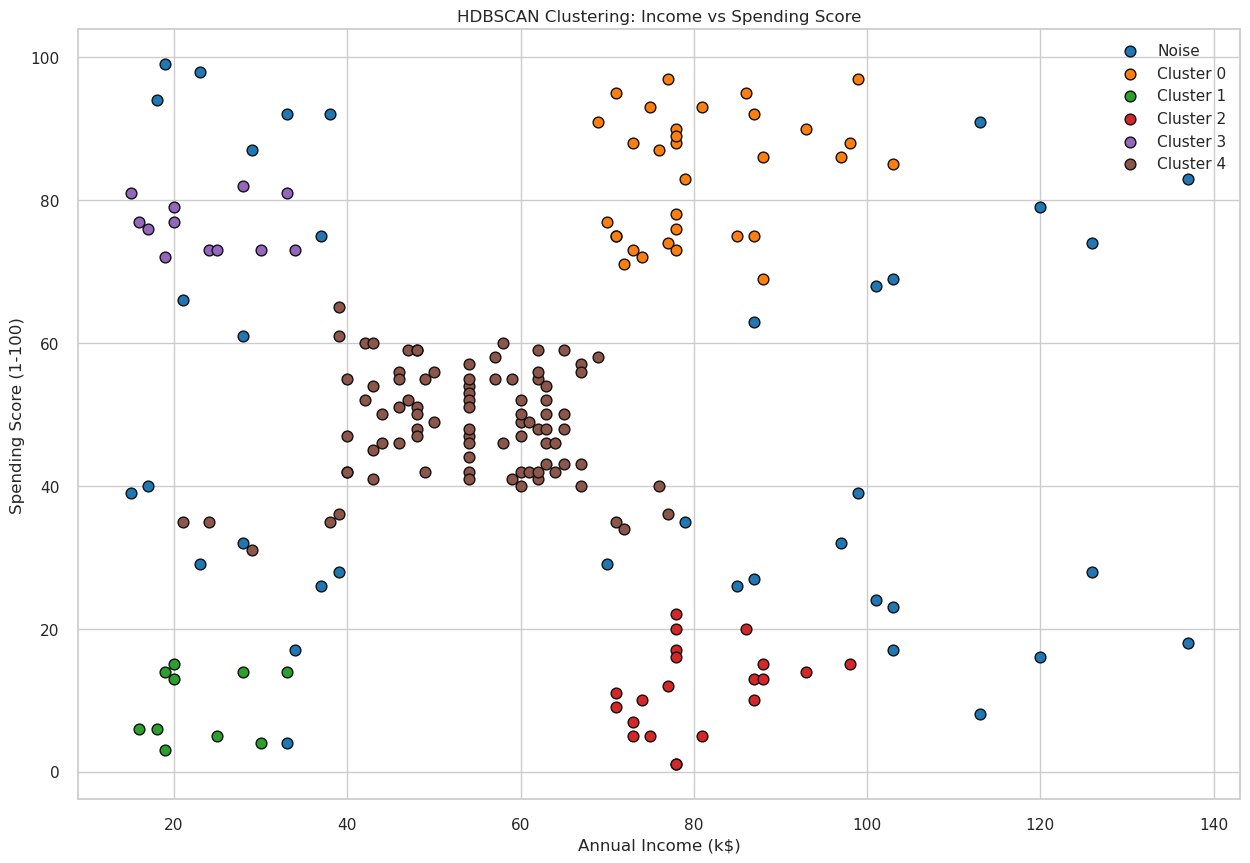

HDBSCAN Cluster Counts:
HDBSCAN_Cluster
 4    88
-1    37
 0    32
 2    21
 3    12
 1    10
Name: count, dtype: int64


In [13]:
import hdbscan

# Clustering analysis using HDBSCAN
# Fit HDBSCAN on scaled 2D data
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
hdbscan_labels = hdbscan_clusterer.fit_predict(X_2d_scaled)

# Add HDBSCAN cluster labels to dataframe
data['HDBSCAN_Cluster'] = hdbscan_labels

# Visualize HDBSCAN clusters
plt.figure(figsize=(15, 10))
unique_hdbscan_labels = np.unique(hdbscan_labels)
hdbscan_colors = sns.color_palette("tab10", len(unique_hdbscan_labels))

for label, color in zip(unique_hdbscan_labels, hdbscan_colors):
    mask = hdbscan_labels == label
    plt.scatter(data.loc[mask, 'Annual Income (k$)'],
                data.loc[mask, 'Spending Score (1-100)'],
                c=[color], label=f'Cluster {label}' if label != -1 else 'Noise', s=60, edgecolor='k')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('HDBSCAN Clustering: Income vs Spending Score')
plt.legend()
plt.show()

# Print cluster counts
print("HDBSCAN Cluster Counts:")
print(data['HDBSCAN_Cluster'].value_counts())

# Moving on to 3D cluster analysis

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler_3d = StandardScaler()
X_3d_scaled = scaler_3d.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Perform KMeans clustering on scaled data
kmeans_3d = KMeans(n_clusters=5, random_state=42)
kmeans_3d_labels = kmeans_3d.fit_predict(X_3d_scaled)
data['KMeans_3D_Cluster'] = kmeans_3d_labels

import plotly.express as px

fig = px.scatter_3d(
    data,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color='KMeans_3D_Cluster',
    title='KMeans Clustering (Standardized): Age vs Income vs Spending Score',
    labels={
        'Age': 'Age',
        'Annual Income (k$)': 'Annual Income (k$)',
        'Spending Score (1-100)': 'Spending Score (1-100)'
    },
    width=900,
    height=700
)
fig.show()

NameError: name 'X_3d_scaled' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler_3d = StandardScaler()
X_3d_scaled = scaler_3d.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

dbscan_3d = DBSCAN(eps=0.5, min_samples=5)
dbscan_3d_labels = dbscan_3d.fit_predict(X_3d_scaled)
data['DBSCAN_3D_Cluster'] = dbscan_3d_labels

fig = px.scatter_3d(
    data,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color='DBSCAN_3D_Cluster',
    title='DBSCAN Clustering: Age vs Income vs Spending Score (scaled)',
    labels={
        'Age': 'Age',
        'Annual Income (k$)': 'Annual Income (k$)',
        'Spending Score (1-100)': 'Spending Score (1-100)'
    },
    width=900,
    height=700
)
fig.show()

In [ ]:
import hdbscan

# Fit HDBSCAN on scaled 3D data
hdbscan_3d = hdbscan.HDBSCAN(min_cluster_size=5)
hdbscan_3d_labels = hdbscan_3d.fit_predict(X_3d_scaled)

# Add HDBSCAN cluster labels to dataframe
data['HDBSCAN_3D_Cluster'] = hdbscan_3d_labels

# Visualize HDBSCAN clusters in 3D
import plotly.express as px

fig = px.scatter_3d(
    data,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color='HDBSCAN_3D_Cluster',
    title='HDBSCAN Clustering: Age vs Income vs Spending Score (scaled)',
    labels={
        'Age': 'Age',
        'Annual Income (k$)': 'Annual Income (k$)',
        'Spending Score (1-100)': 'Spending Score (1-100)'
    },
    width=900,
    height=700
)
fig.show()

# Print cluster counts
print("HDBSCAN 3D Cluster Counts:")
print(data['HDBSCAN_3D_Cluster'].value_counts())

### Key Insights & Takeaways

Key observations and insights:
- Basic Data Info
	- Clean data, no missing/duplicate records
	- 200 records, numerical variables (CustomerID, Age, Annual Income (k$), Spending Score (1-100)), categorical variable (Gender)
- Univariate Analysis
	- Numerical variables:
		- Age is right skewed, i.e younger people shop MallCo, with half between 29-49 years old, most common around 32 years old
		- Annual income is slightly right skewed, i.e. most shoppers have middle and slightly lower income levels with half having annual income of 41k-78k, most common around 54k
		- Spending score is somewhat normally distributed with half of the shoppers falling in a rather wide, middle range of spending scores between 34-73, most common around 42
	- Categorical variables:
		- Gender is quite balanced between female and male (56% vs 44%)
- Multivariate Analysis
	- Scatterplots & Correlation coefficients:
		- Age show obvious linear relationship with spending scores with spending scores declining as age increases (red line sloping down)
		- Female customers show a slightly stronger correlation to this age trend (males, -0.28 vs females, -0.375)
		- Surprisingly there is virtually no linear relationship between annual income and spending scores nor age and annual income (flat red line)
		- That said, the annual income vs spending score scatterplot shows clear clusters which warrant more segmentation analysis
		- All three scatterplots show regression lines (red line) with meaningful red shaded areas, indicating variance, suggesting that there are likely non-linear relationships which are not captured
	- Boxplot distribution:
		- Both genders are quite comparable in distribution across age, income and spending score, suggesting that approaches can be largely gender neutral
- Group Analysis
	- Barchart of average spending score by Age and Income group
		- Highest spending groups are 21-30 and 31-40, drops significantly in groups after 40 with slight uptick in the 60+ group
		- Women spend a little more than males in each age group with the exception of the highest spending group of 21-30
		- Spending levels are mostly the same across all income groups
		- Again women spend a little more across most income groups, with the exception of being significantly lower than males in the very high income group
	- Boxplots of spending score distribution by Age and Income group
		- Boxplots show wide distributions across younger age groups (particularly in the highest spending groups of 21-30 and 31-40 groups) with smaller distribution in older groups, i.e. despite being the highest spending 		  groups, younger groups have wide spending habits (less predictable) and while older groups have more consistent spending habits, they are consistently lower spending
		- Both genders across age groups spend about the same on average
		- Males have significantly more variability in spending in the <20 and 31-40 groups
		- Similarly, there are wide variability in spending levels across all income groups
		- Males have more variability in spending levels across more income groups, particularly in the very high income group where women are consistently spending very little
- Segmentation Analysis
	- 5 clusters visibly obvious, can be grouped into 
		- Average income / Average spenders (40.5% of total, middle income, wide age range (18-70), average spending score: 49.52)
		- High income / High spenders (19.5% of total, high income, clear age demographic (27-40, average 32, prime earning years), average spending score: 82.13)
		- Low income / Low spenders (11% of total, low income, clear age demographic (18-35, average 25, early career), average spending score: 79.36)
		- High income / Low spenders (17.5% of total, high income, wide age range (19-67), average spending score: 20.91)

#### Insights and actions:
- Age is right skewed and has clear relationship with spending levels, this indicates that MallCo attracts and caters to younger people more than older ones currently
- Income does not influence spending in MallCo, possibly indicating that MallCo caters to lifestlye or preferences rather than materialism
- This supports the two most valuable customer segments currently which are the younger early career to prime career professionals
- Marketing budget for these two segments should be focused on uncovering what they are spending on and developing marketing that protrays the lifestyle they aspire towards and on shopping experiences that reflect the same
- Doing so can also address the high spending variability within these age groups
- The third most valuable segment is the high income / low spenders segment
- This segment represents a high value untapped market. Marketing dollars should go into uncovering what lifestyle / preferences this group resonates with and offer products and services in MallCo for them, tailoring marketing programs and shopping experiences to their needs. Special focus should go into understanding and catering for females in the very high income group which MallCo is currently grossly underserving
- The average income / average spenders segment represent an undifferentiated group across age with middle income, offering loyalty programs and consistent value should be prioritised for this group
- The low income / low spenders group is another segment that seem undifferentiated across age except the have little spending power, essential items, discounts and value messaging would resonate with this group
- Mall design and tenancy grouping would be crucial in catering for the various segments of customers and differentiating for their needs
- Finally, MallCo should think about how to cater for changes in lifestyle and preferences as its customers age, to "grow" with them and retain them and their spending levels longer particularly for age 40 and onwards
